In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

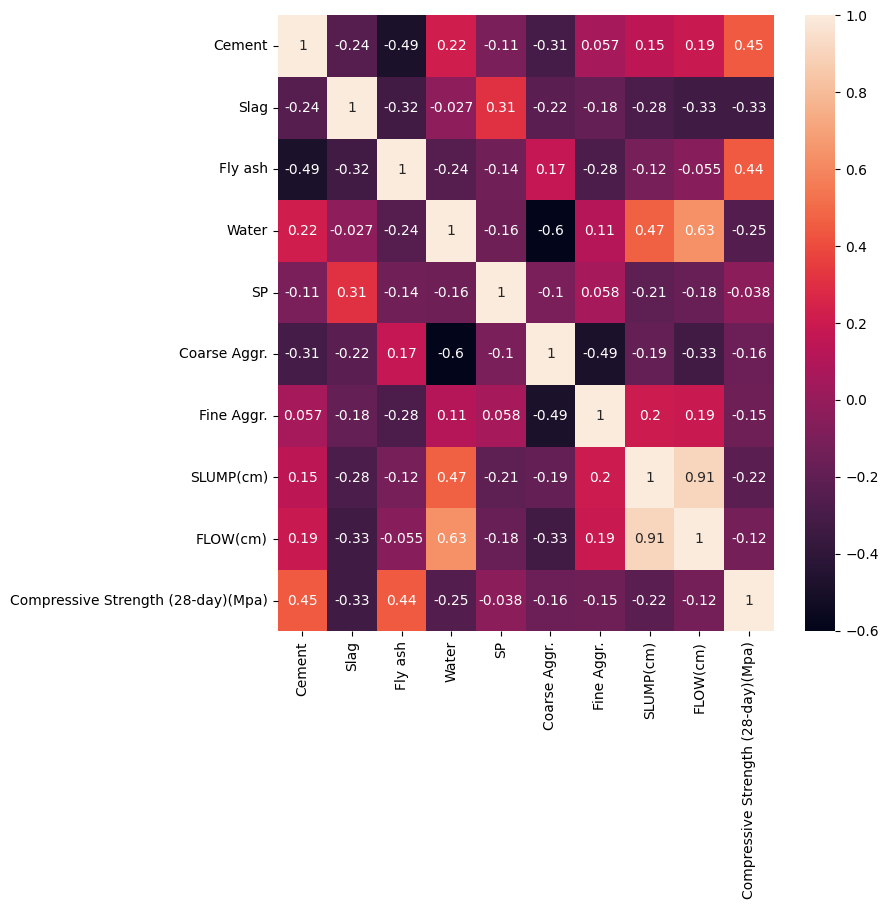

In [7]:
plt.figure(figsize=(8,8), dpi=100)
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [9]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [10]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR, LinearSVR

base_model = SVR()

base_model.fit(X_train_scaled, y_train)

y_pred = base_model.predict(X_test_scaled)

mse = mean_absolute_error(y_test, y_pred)
mre = mean_squared_error(y_test, y_pred)
rmre = np.sqrt(mean_squared_error(y_test, y_pred))


print(f'MSE: {mse}')
print(f'MRE: {mre}')
print(f'RMSE: {rmre}')

MSE: 5.236902091259178
MRE: 44.83527552212948
RMSE: 6.695914838327133


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.linspace(0.01,1,20),
              'kernel': ['linear','rbf','poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2,3,4],
              'epsilon': np.linspace(0,2,20)}

svr = SVR()

grid_model_svr = GridSearchCV(estimator=svr, param_grid=param_grid)
grid_model_svr.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
                         'degree': [2, 3, 4],
                         'epsilon': array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [22]:
print(grid_model_svr.best_params_)

{'C': np.float64(1.0), 'degree': 2, 'epsilon': np.float64(1.894736842105263), 'gamma': 'scale', 'kernel': 'linear'}


In [24]:
y_pred = grid_model_svr.predict(X_test_scaled)

mse = mean_absolute_error(y_test, y_pred)
mre = mean_squared_error(y_test, y_pred)
rmre = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MSE: {mse}')
print(f'MRE: {mre}')
print(f'RMSE: {rmre}')

MSE: 2.5742718032561753
MRE: 10.358966886290432
RMSE: 3.2185348974790426
